In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

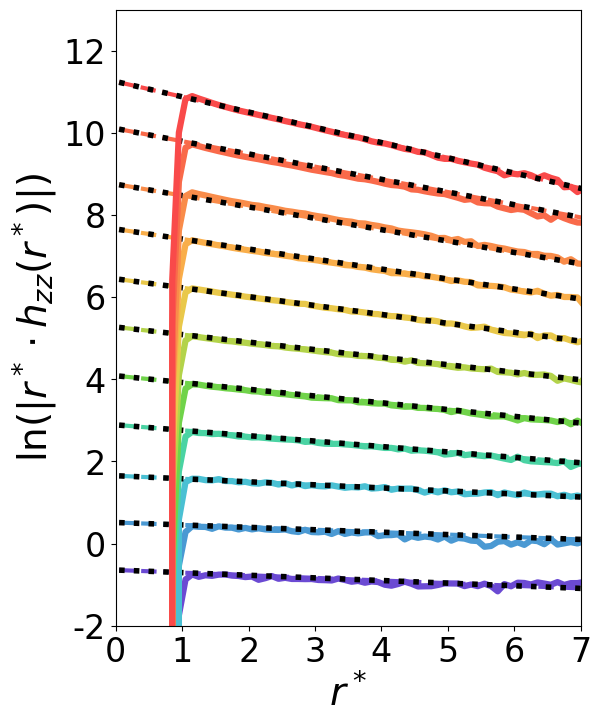

In [3]:
base_dir = "./" 
os.chdir(base_dir)

gzz_files = sorted(glob.glob("gzz_LD_5_WCA_*.csv"))
fit_params = pd.read_csv("zzfit_params_LD_5_WCA.csv")


r_values = fit_params["r_value"].tolist() if "r_value" in fit_params.columns else \
           [float(name.split("_")[-1].replace(".csv","")) for name in gzz_files]
lambda_d = fit_params["lambda_debye"].tolist()

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]

def fit_function(r, A, l, omega, phi):
    return A * np.exp(-r / l) * np.abs(np.cos(omega * r + phi))

def fit_function_simple(r, A, l):
    return A * np.exp(-r / l)


plt.figure(figsize=(6,8))
plt.yscale("log")
plt.ylim(0.01, 10**13)
plt.xlim(0, 7)
plt.xticks([0,1,2,3,4,5,6,7], fontsize=24)
plt.yticks(fontsize=24)
plt.xlabel(r'$r^*$', fontsize=28)
plt.ylabel(r'ln$(|r^* \cdot h_{zz}(r^*)|)$', fontsize=28)


yticks = [1e-2, 1e0, 1e2, 1e4, 1e6, 1e8, 1e10, 1e12]  
yticklabels = ['-2', '0', '2', '4', '6', '8', '10', '12']
plt.yticks(yticks, yticklabels, fontsize=24)


vertical = [0.01, 0.9, 1.8, 2.73, 3.64, 4.54, 5.43, 6.35, 7.18, 8.2, 9.05]

for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"gzz_LD_5_WCA_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["r"])
    y = np.array(data["gZZ_mean"])
    y = np.abs(x*y)
    yerr = data["gZZ_err"]

    params = fit_params.iloc[i]
    A_fit = params["A_fit"]
    lambda_fit = params["lambda_fit"]
    omega_fit = params["omega_fit"]
    phi_fit = params["phi_fit"]
    lambda_fit_err = params["lambda_fit_error"]

    plt.plot(x, y/4 * (15 ** i), linestyle="-", color=color, linewidth=4.5, label=f"r={r_value}")
    plt.fill_between(x, np.abs(y-yerr)*(15**i)/4, (y+yerr)*(15**i)/4, color = color, alpha=0.4)

    if omega_fit == 0:
        fit_line = np.array(A_fit*np.exp(-x/lambda_fit)*(20**vertical[i]))/4
        plt.plot(x, fit_line, linestyle="--", color = color, linewidth=3)
        # plt.fill_between(x,fit_line-lambda_fit_err*(20**vertical[i])/4, fit_line+lambda_fit_err*(20**vertical[i])/4, color = color, alpha=0.55 )
        plt.plot(x, fit_function_simple(x, A_fit, lambda_fit)*(20**vertical[i])/4, linestyle=":", color="black", linewidth=4)
    else:
        fit_line = np.array(A_fit*np.exp(-x/lambda_fit)*(20**vertical[i]))/4
        plt.plot(x, fit_line, linestyle="--", color = color, linewidth=3)
        # plt.fill_between(x,fit_line-lambda_fit_err*(20**vertical[i])/4, fit_line+lambda_fit_err*(20**vertical[i])/4, color = color, alpha=0.55 )
        plt.plot(x, fit_function(x, A_fit, lambda_fit, omega_fit, phi_fit)*(20**vertical[i])/4, linestyle=":", color="black", linewidth=4)
plt.show()

